In [63]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/human-stress-prediction/Stress.csv


In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import gensim.downloader as api



# **Importing data**

In [3]:
stress_data_path = '../input/human-stress-prediction/Stress.csv'
stress_data = pd.read_csv(stress_data_path)
stress_data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [28]:
longest_post = max(stress_data.text, key=len)
len(longest_post.split()) #nr of words in the longest post

292

In [6]:
post_lengths = stress_data.text.apply(len) #lengths of all posts

post_lengths.mean() #avg length

posts = stress_data['text'].tolist()  # extract the 'posts' column as a list
labels = stress_data['label'].tolist()  # extract the 'labels' column as a list

# combine the two lists into a list of tuples
data = list(zip(posts, labels))


In [70]:
data[0][1]

1

# **Text Preprocessing**

In [6]:

#removing special characters 
#def remove_spec(text):
 #   return re.sub(r'[^a-zA-Z0-9\s]', '', text)

#clean_posts = list(map(remove_spec, stress_data.text))


In [42]:
import spacy
nlp = spacy.load("en_core_web_lg")

def preprocess_and_vectorize(post):
    doc = nlp(post) #fit the spacy model
    
    clean_tokens = []
    for token in doc:
        if token.is_punct or token.is_stop:
            continue #do not include punctuation chars and stopwords
        clean_tokens.append(token.lemma_)
    
    return clean_tokens


In [10]:
data[0]

('He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.',
 1)

In [43]:
tokenized_data = []
label_data = []
for post,label in data: 
    tokenized_post = preprocess_and_vectorize(post)
    if tokenized_post:
        tokenized_data.append(tokenized_post)
        label_data.append(label)


# A sprinkle of Data Visualization

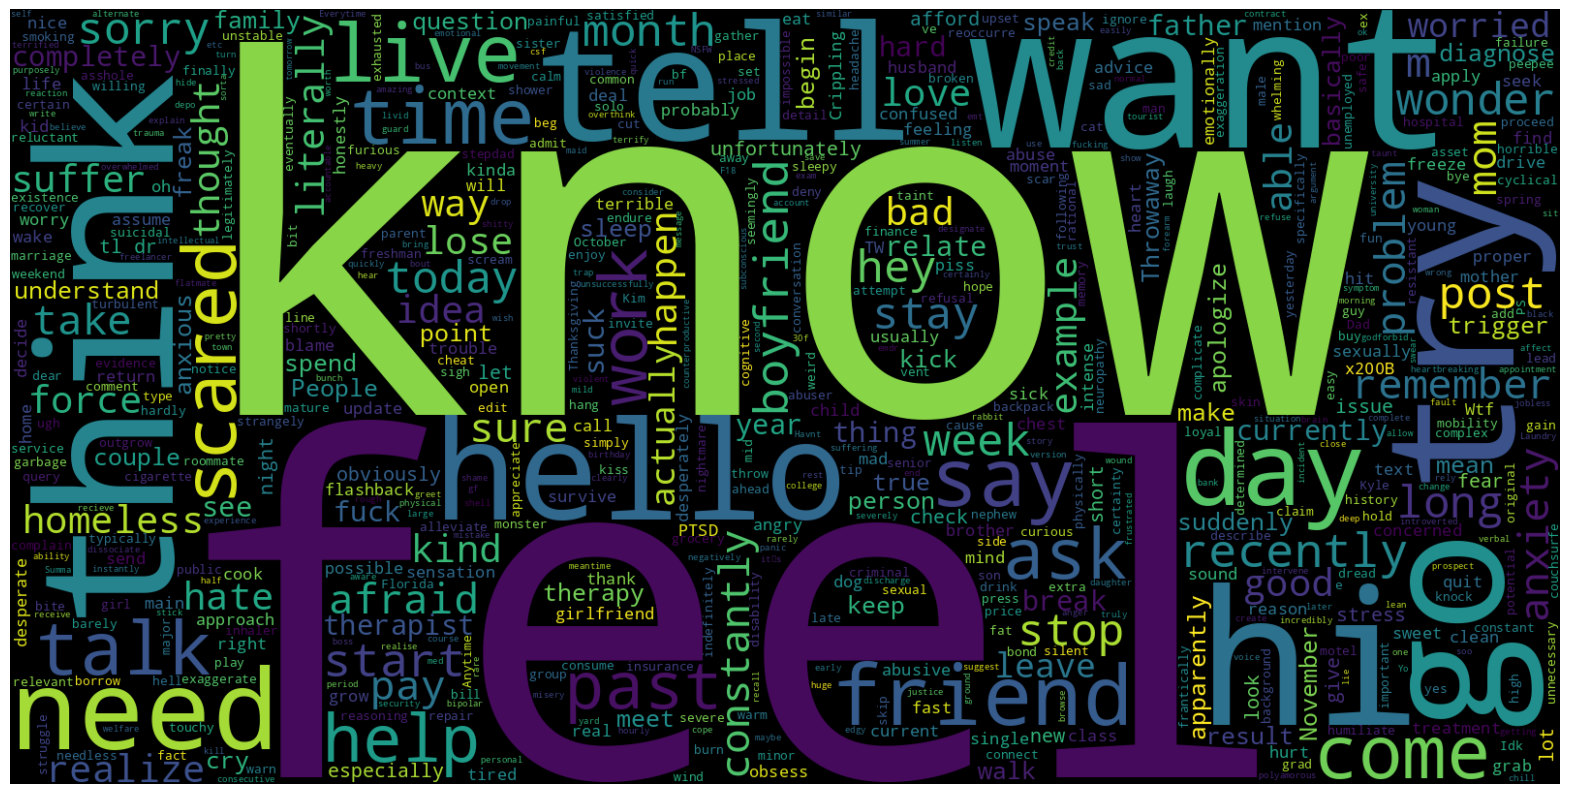

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract input texts with label 1
input_texts = [data[0] for data, label in zip(tokenized_data, label_data) if label == 1]

# Generate word cloud
wordcloud = WordCloud(max_words=2000, width=1600, height=800).generate(' '.join(input_texts))

# Plot word cloud
plt.figure(figsize=(20, 20)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


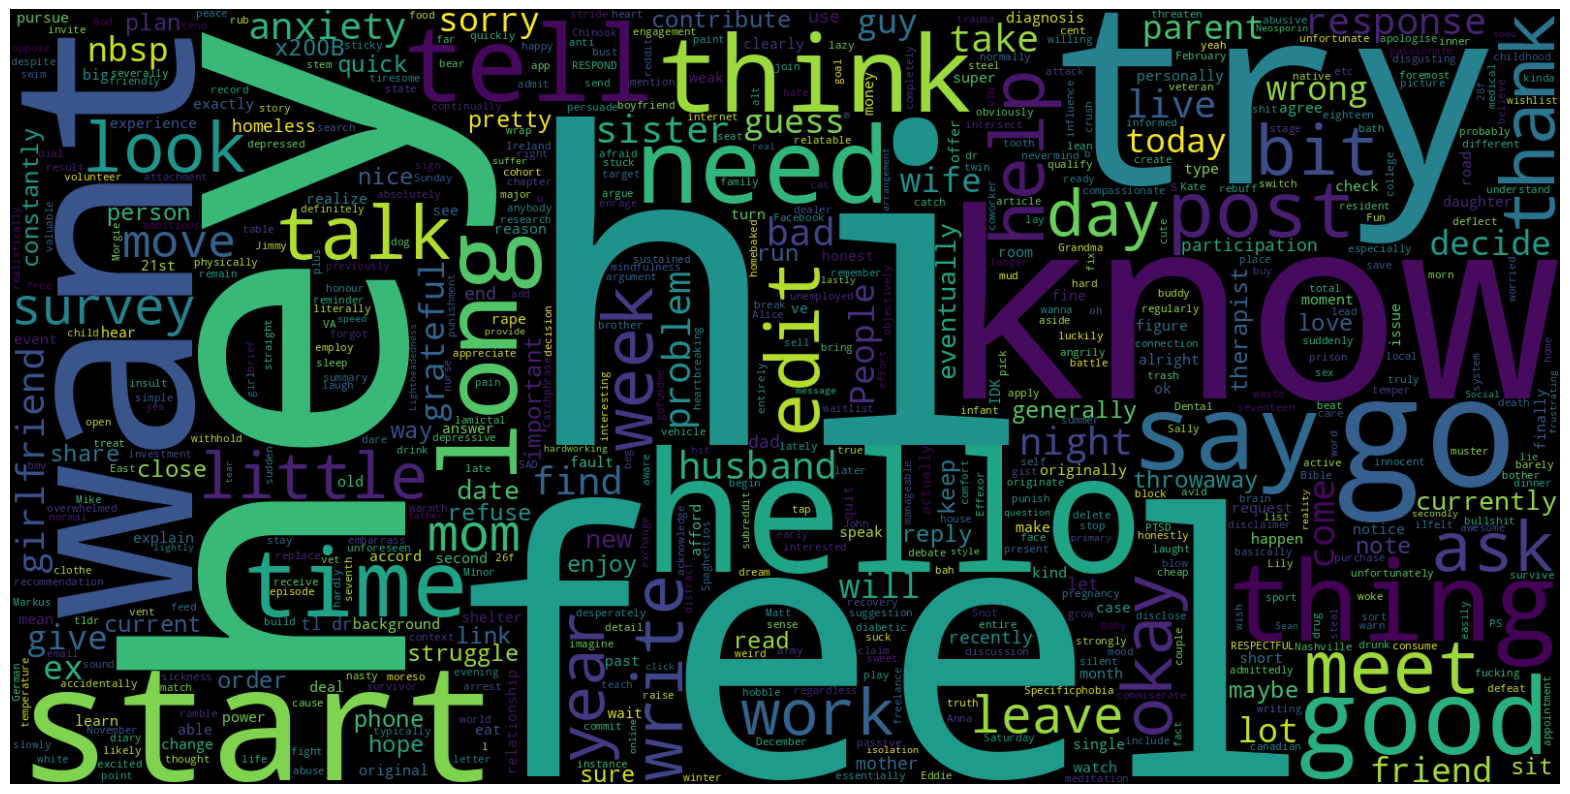

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract input texts with label 0
input_texts = [data[0] for data, label in zip(tokenized_data, label_data) if label == 0]

# Generate word cloud
wordcloud = WordCloud(max_words=2000, width=1600, height=800).generate(' '.join(input_texts))

# Plot word cloud
plt.figure(figsize=(20, 20)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


In [15]:
print(tokenized_data[0])
print(label_data[0])


['say', 'feel', 'way', 'suggete', 'rest', 'TRIGGER', 'AHEAD', "YOUI'RE", 'HYPOCONDRIAC', 'like', 'decide', 'look', 'feeling', 'doom', 'hope', 'maybe', 'getting', 'suck', 'rabbit', 'hole', 'ludicrous', 'conspiracy', 'stupid', 'psychic', 'test', 'new', 'age', 'b.s', 'laugh', 'road', 'end', 'read', 'sense', 'doom', 'indicative', 'health', 'ailment', 'prone', 'doom', 'gloom', "f'n", 'worried', 'heart', 'happen', 'physical', '48', 'hour']
1


# **Splitting Data**

In [54]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tokenized_data, 
    label_data, 
    train_size=0.8, 
    random_state=4
)



In [54]:
##X = clean_posts #attributes according to which we classify
#y = stress_data.label #class
# Convert X and y to NumPy arrays

# Initialize the stratified k-fold cross-validation object
#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
#split_data = skf.split(X, y)

Vectorizing train data

# **Bag of Words**

# create the transform
tf_vectorizer=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,1))

# tokenize and build vocab
bow_train = tf_vectorizer.fit_transform(X_train)
# encode document
bow_test = tf_vectorizer.transform(X_test)
# summarize
#print(sorted(vectorizer.vocabulary_))
print('BOW train: ',bow_train.shape)
print('BOW test: ',bow_test.shape)

print(len(vectorizer.idf_))

# summarize encoded vector
print(vectorized_posts[0].shape)
print(vectorized_posts[0].toarray())


In [ ]:
#print(len(vectorized_posts))
#print(len(stress_data))


# **Bag of N-Grams**

# create the transform
tf_vectorizer2 = TfidfVectorizer(analyzer='word', ngram_range=(7, 7)) #instead of separate words treat them as 7-grams, groups of len 7
# tokenize and build vocab
bon_train = tf_vectorizer2.fit_transform(X_train)

# encode document
bon_test = tf_vectorizer2.transform(X_test)
# summarize
#print(sorted(vectorizer.vocabulary_))
print('BON train: ',bow_train.shape)
print('BON test: ',bow_test.shape)



# **Gensim's Word2Vec**

In [16]:
#vectorized_w2v = [gensim.utils.simple_preprocess(text) for text in clean_posts]
#len(vectorized_w2v)

wv = api.load("glove-twitter-25")


[============--------------------------------------] 24.5% 25.6/104.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 104.8/104.8MB downloaded


In [55]:
wv.get_mean_vector(X_train[2])


array([-0.07963082,  0.02786993, -0.1118979 ,  0.07432982,  0.06536698,
        0.00142367,  0.09981715, -0.21375556,  0.06222064,  0.04254569,
        0.02311464,  0.09475099, -0.5490071 ,  0.01281391,  0.07900295,
        0.06116072,  0.04513504,  0.00119624,  0.04749446, -0.08894351,
       -0.07666157,  0.10886507,  0.12574716, -0.00554666, -0.09551053],
      dtype=float32)

array([0.43850474, 0.66734039, 0.52536627, 0.45654675, 0.43667133,
       0.45638129, 0.83738833, 0.65556139, 0.18072273, 0.45630573,
       0.35773767, 0.57974795, 0.21359931, 0.47145421, 0.43528855,
       0.48659876, 0.38152784, 0.26973089, 0.4277186 , 0.49782715,
       0.42588192, 0.55403423, 0.35916591, 0.50301711, 0.54912178])

In [59]:
wv_train_data = []
for tokenized_post in X_train:
    if tokenized_post:  #some may be empty bcs of stopword removal
        wv_train_data.append(wv.get_mean_vector(tokenized_post)) #get mean vector embedding for every post
wv_train_data[2]

array([-0.07963082,  0.02786993, -0.1118979 ,  0.07432982,  0.06536698,
        0.00142367,  0.09981715, -0.21375556,  0.06222064,  0.04254569,
        0.02311464,  0.09475099, -0.5490071 ,  0.01281391,  0.07900295,
        0.06116072,  0.04513504,  0.00119624,  0.04749446, -0.08894351,
       -0.07666157,  0.10886507,  0.12574716, -0.00554666, -0.09551053],
      dtype=float32)

array([-0.07963082,  0.02786993, -0.1118979 ,  0.07432982,  0.06536698,
        0.00142367,  0.09981715, -0.21375556,  0.06222064,  0.04254569,
        0.02311464,  0.09475099, -0.5490071 ,  0.01281391,  0.07900295,
        0.06116072,  0.04513504,  0.00119624,  0.04749446, -0.08894351,
       -0.07666157,  0.10886507,  0.12574716, -0.00554666, -0.09551053],
      dtype=float32)

# **Naive Bayes**

* word2vec 0.6948853615520282


In [60]:
gnb = GaussianNB()
gnb.fit(wv_train_data, y_train)


GaussianNB()

In [61]:
wv_test_data = []
for tokenized_post in X_test:
    if tokenized_post:  #some may be empty bcs of stopword removal
        wv_test_data.append(wv.get_mean_vector(tokenized_post)) #get mean vector embedding for every post
prediction = gnb.predict(wv_test_data)
gnb_score=accuracy_score(y_test,prediction)
print("gnb_score :",gnb_score)

gnb_score : 0.6948853615520282


# LSTM :)

In [75]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

2024-04-28 19:47:20.000961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 19:47:20.001143: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 19:47:20.150140: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [76]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

NameError: name 'MAX_SEQUENCE_LENGTH' is not defined

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Initialize variables to store the total accuracy across all folds
total_accuracy = 0.0

# Iterate over the folds
for train_index, test_index in split_data:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    gnb.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = gnb.predict(X_test)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_pred)

    # Accumulate accuracy for all folds
    total_accuracy += fold_accuracy

    # Print accuracy for this fold
    print("Accuracy for this fold:", fold_accuracy)

# Calculate average accuracy across all folds
average_accuracy = total_accuracy / skf.n_splits

print("Average Accuracy:", average_accuracy)



# initialize the naive bayes classifier
gnb1 = GaussianNB()
gnb2 = GaussianNB()

#fitting the nb for bag of words
gnb_bow=gnb1.fit(bow_train.toarray(), y_train)
print(gnb_bow)
#fitting the nb for tfidf features
gnb_bon=gnb2.fit(bon_train.toarray(), y_train)
print(gnb_bon)


#Predicting the model for bag of words
gnb_bow_predict = gnb_bow.predict(bow_test.toarray())

#Predicting the model for bag of ngrams
gnb_bon_predict = gnb_bon.predict(bon_test.toarray())


#Accuracy score for bag of words
gnb_bow_score=accuracy_score(y_test,gnb_bow_predict)
print("gnb_bow_score :",gnb_bow_score)
#Accuracy score for tfidf features
gnb_bon_score=accuracy_score(y_test,gnb_bon_predict)
print("gnb_bon_score :",gnb_bon_score)